In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

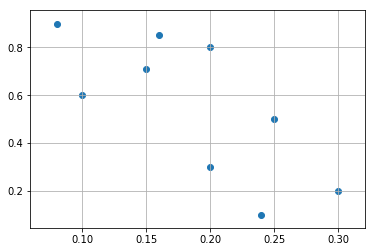

In [3]:
points = [[0.2,0.8],[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]]
X = []
Y = []
for pt in points :
    X.append(pt[0])
    Y.append(pt[1])
    
plt.scatter(X, Y)
plt.grid()
plt.show()

0
0
0
0
0
1
1
1
1
Cluster center : [0.138 0.772] [0.2475 0.275 ] 

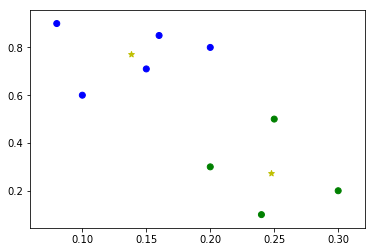

In [8]:
## Kmeans Sklearn implementation

from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2)
model.fit(points)
color = []
color_arr = ['b','g','y','orange']
for i in range(len(model.labels_)):
#     print(model.labels_[i])
    color.append(color_arr[model.labels_[i]])
    
cluster_center = model.cluster_centers_
cluster_x = []
cluster_y = []
print("Cluster center : ", end = "")
for pt in cluster_center :
    print(pt, end = " ")
    cluster_x.append(pt[0])
    cluster_y.append(pt[1])

plt.scatter(X, Y, color = color)
plt.scatter(cluster_x, cluster_y, color = 'y', marker = "*")
plt.show()

In [31]:
## Custom kmeans implementation

class KMeans :
    def __init__(self, k = 2, num_iter = 100) :
        self.k = k
        self.num_iter = num_iter
        self.clusters = {}
        self.cluster_points = {}
        self.labels = []
        
        
    def get_dist(self, p, q) :
        dist = 0
        for i in range (len(p)) :
            dist += (p[i] - q[i]) ** 2
        return math.sqrt(dist)
    
    
    def fit(self, points) :
        for i in range(self.k) :
            self.clusters[i] = points[i]
            
        self.labels = [-1] * len(points)
        
        while(self.num_iter > 0) :
            self.num_iter -= 1
            
            for i in range (self.k) :
                self.cluster_points[i] = []
                
            ind = 0
            for pt in points :
                cluster_idx = -1
                min_val = 10 ** 18
                for j in self.clusters :
                    dist = self.get_dist(pt, self.clusters[j])
                    if dist < min_val :
                        min_val = dist
                        cluster_idx = j
                self.cluster_points[cluster_idx].append(pt)
                self.labels[ind] = cluster_idx
                ind += 1
                
            new_centroids = {}
            
            for i in self.clusters : 
                new_pt = [0] * len(points[0])
                for j in self.cluster_points[i] :
                    for p in range (len(j)) :
                        new_pt[p] += j[p]
                    
                if len(self.cluster_points[i]) > 0 :
                    for j in range (len(new_pt)) :
                        new_pt[j] /= len(self.cluster_points[i])
                new_centroids[i] = new_pt
                
#             if self.num_iter > 0 :
            self.clusters = new_centroids
#             print(self.clusters)

[0, 0, 0, 0, 0, 1, 1, 1, 1]
{0: [0.138, 0.772], 1: [0.2475, 0.275]}
Final Centroids with points : 


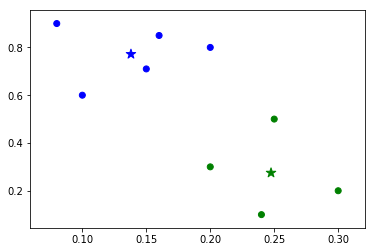

In [32]:
color = []
color_arr = ['b','g','y','orange']

model = KMeans()
model.fit(points)
print(model.labels)
for i in range (len(model.labels)) :
    color.append(color_arr[model.labels[i]])
    
cluster_center = model.clusters
print(model.clusters)
cluster_x = []
cluster_y = []
# print("Cluster center : ", end = "")
for pt in cluster_center :
    cluster_x.append(cluster_center[pt][0])
    cluster_y.append(cluster_center[pt][1])
    
print("Final Centroids with points : ")
plt.scatter(X, Y, color = color)
plt.scatter(cluster_x ,cluster_y, color=color_arr, marker="*", s=100)
plt.show()